In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("data/polished.csv")

<Axes: ylabel='BMI'>

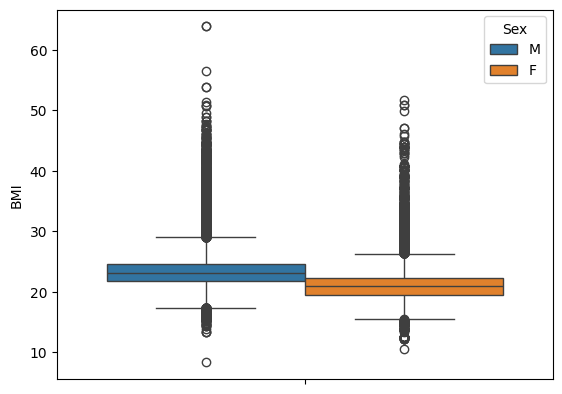

In [4]:
df["BMI"] = df["Weight"] / (df["Height"] / 100) ** 2
df["BMI"].head()
sns.boxplot(data=df, y ="BMI", hue="Sex")

In [5]:
df["Won Medal"] = df.Medal != "No Medal"

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Height'], df['Won Medal'])
print(slope, intercept, r_value, p_value, std_err)

0.0031478845364072837 -0.40061493498812706 0.09600670408740011 0.0 7.993554613101801e-05


In [7]:
slopes = df.groupby('Sport').apply(lambda group: stats.linregress(group['Height'], group['Won Medal'])[0])

slopes_df = slopes.reset_index(name='LC').sort_values(by="LC")
slopes_df

C:\Users\Rafael\AppData\Local\Temp\ipykernel_12052\1259110488.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = df.groupby('Sport').apply(lambda group: stats.linregress(group['Height'], group['Won Medal'])[0])


,Sport,LC
35,Tug-Of-War,-0.021999
10,Diving,-0.002007
15,Gymnastics,-0.001488
4,Baseball,-0.001454
30,Table Tennis,-0.001045
33,Trampolining,-0.000998
16,Handball,-0.000738
38,Weightlifting,-0.000681
19,Judo,-0.000447
36,Volleyball,-0.000259


C:\Users\Rafael\AppData\Local\Temp\ipykernel_12052\728851092.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Tug-Of-War'),
 Text(1, 0, 'Diving'),
 Text(2, 0, 'Gymnastics'),
 Text(3, 0, 'Baseball'),
 Text(4, 0, 'Table Tennis'),
 Text(5, 0, 'Trampolining'),
 Text(6, 0, 'Handball'),
 Text(7, 0, 'Weightlifting'),
 Text(8, 0, 'Judo'),
 Text(9, 0, 'Volleyball'),
 Text(10, 0, 'Ice Hockey'),
 Text(11, 0, 'Rugby'),
 Text(12, 0, 'Archery'),
 Text(13, 0, 'Football'),
 Text(14, 0, 'Shooting'),
 Text(15, 0, 'Badminton'),
 Text(16, 0, 'Wrestling'),
 Text(17, 0, 'Art Competitions'),
 Text(18, 0, 'Beach Volleyball'),
 Text(19, 0, 'Triathlon'),
 Text(20, 0, 'Rowing'),
 Text(21, 0, 'Hockey'),
 Text(22, 0, 'Tennis'),
 Text(23, 0, 'Fencing'),
 Text(24, 0, 'Athletics'),
 Text(25, 0, 'Basketball'),
 Text(26, 0, 'Water Polo'),
 Text(27, 0, 'Sailing'),
 Text(28, 0, 'Equestrianism'),
 Text(29, 0, 'Boxing'),
 Text(30, 0, 'Canoeing'),
 Text(31, 0, 'Golf'),
 Text(32, 0, 'Rugby Sevens'),
 Text(33, 0, 'Cycling'),
 Text(34, 0, 'Swimming'),
 Text(35, 0, 'Synchronized Swimming'),
 Text(36, 0, 'Modern Pentathlon'

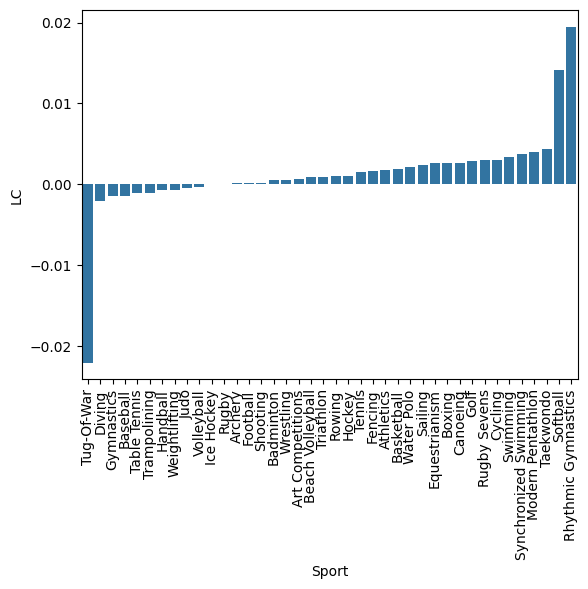

In [8]:
plot = sns.barplot(data=slopes_df, x="Sport", y="LC")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


In [10]:
male = df[df.Sex == "M"]
female = df[df.Sex == "F"]

slopes_male = male.groupby('Sport').apply(lambda group: stats.linregress(group['Height'], group['Won Medal'])[0])

slopes_male_df = slopes_male.reset_index(name='LC').sort_values(by="LC")

slopes_female = female.groupby('Sport').apply(lambda group: stats.linregress(group['Height'], group['Won Medal'])[0])

slopes_female_df = slopes_female.reset_index(name='LC').sort_values(by="LC")